## 🧠 Building and Tuning an ANN with Scikit-Learn (MLPRegressor)

We’ll focus on tuning the following:

hidden_layer_sizes: Number of neurons in each layer

activation: Activation function

learning_rate_init: Initial learning rate

batch_size: Number of samples per gradient update

max_iter: Maximum number of iterations (epochs)

## 📌 Step 1: Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


## 📌 Step 2: Load and Prepare the Dataset

In [9]:
# Load Excel file
df = pd.read_excel('Collected Data_PS_GitHub upload.xlsx')

# Check shape and columns
print("Original shape:", df.shape)
print("Original columns:", df.columns.tolist())


# Select columns from index 1 to 6 (i.e., columns B to G in Excel)
df = df.iloc[:, 1:7]

# Rename columns for readability
df.columns = ['Slope_Angle', 'CbygammaH', 'phi', 'kh', 'kvr', 'fmp']

# View first few rows
df.head()

Original shape: (19128, 13)
Original columns: ['itr', 'Slope Angle', 'CbygammaH', 'phi', 'kh', 'kvr', 'fmp', 'Xmp', 'Ymp', 'Rmp', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']


,Slope_Angle,CbygammaH,phi,kh,kvr,fmp
0,15,0.0,10,0.00,-0.5,0.67603
1,15,0.0,10,0.05,-0.5,0.56581
2,15,0.0,10,0.10,-0.5,0.48811
3,15,0.0,10,0.15,-0.5,0.43041
4,15,0.0,10,0.20,-0.5,0.38588


## ✅ Explanation:

We only want 6 columns: 5 inputs and 1 target (FMP).

Python uses 0-based indexing, so 1:7 selects columns 2–7.

Renaming helps keep code clean and readable.

## 📘 Step 3: Separate Features and Target

In [13]:
# Features and target
X = df.drop('fmp', axis=1)
y = df['fmp']


## 📘 Step 4: Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🔍 Why Scale?

Neural networks are sensitive to the scale of data.

StandardScaler scales each feature to have mean = 0 and std = 1.

## 📌 Step 5: Train-Test Split

In [24]:
# Use 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 📘 Step 6: Define the base ANN Model (MLPRegressor)

In [27]:
from sklearn.neural_network import MLPRegressor

# Define a simple ANN model

# mlp = MLPRegressor(hidden_layer_sizes=(100, 50),
#                    activation='relu',
#                    solver='adam',
#                    learning_rate_init=0.01,
#                    max_iter=1000,
#                    random_state=42)


# Define the initial ANN model
mlp = MLPRegressor(random_state=42)

## 📌 Step 7: Hyperparameter Tuning using GridSearchCV ✅

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Set up a hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [32, 64],
    'max_iter': [300]
}

# 5-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search to find the best combination
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           cv=kfold,
                           scoring='r2',
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'batch_size': [32, 64],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [300]},
             scoring='r2', verbose=2)

## 📌 Step 8: Show Best Parameters

In [37]:
print("✅ Best Hyperparameters Found:")
print(grid_search.best_params_)


✅ Best Hyperparameters Found:
{'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'max_iter': 300}


## 📌 Step 9: Evaluate the Best Model

In [40]:
# Use the best model found
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n🔍 R² on Test Data: {r2:.4f}")
print(f"🔍 Mean Squared Error: {mse:.4f}")


🔍 R² on Test Data: 0.9974
🔍 Mean Squared Error: 0.0021


## 📌 Step 10: Visualize Predictions

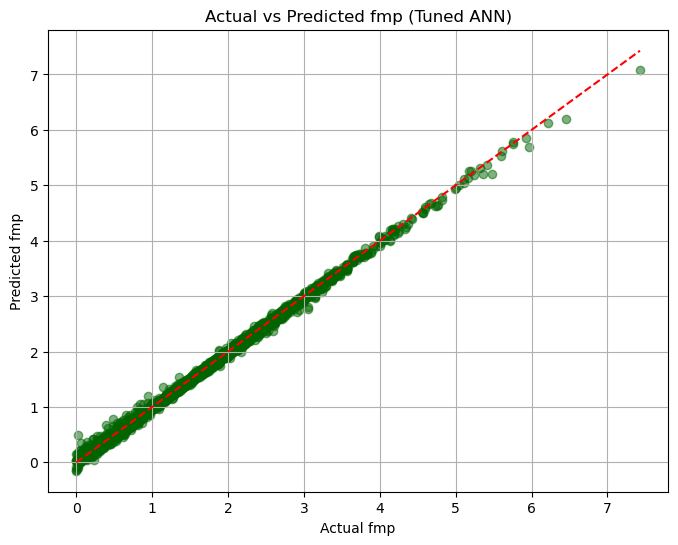

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual fmp')
plt.ylabel('Predicted fmp')
plt.title('Actual vs Predicted fmp (Tuned ANN)')
plt.grid(True)
plt.show()


## 📊 Interpretation:

A perfect model would fall exactly on the red dashed line.

Scattering around the line shows model error.

## 📊 Code to Visualize the Summary Table of Pipeline Steps

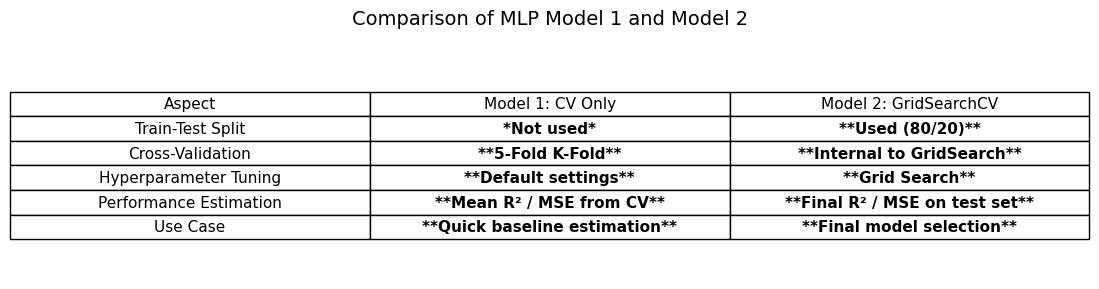

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create Summary Table with Emphasis Using Bold Text
comparison_data = {
    "Aspect": [
        "Train-Test Split",
        "Cross-Validation",
        "Hyperparameter Tuning",
        "Performance Estimation",
        "Use Case"
    ],
    "Model 1: CV Only": [
        "**Not used**",
        "**5-Fold K-Fold**",
        "**Default settings**",
        "**Mean R² / MSE from CV**",
        "**Quick baseline estimation**"
    ],
    "Model 2: GridSearchCV": [
        "**Used (80/20)**",
        "**Internal to GridSearch**",
        "**Grid Search**",
        "**Final R² / MSE on test set**",
        "**Final model selection**"
    ]
}

# Convert to DataFrame
df_comparison = pd.DataFrame(comparison_data)

# Step 2: Display the Table in a Matplotlib Plot
fig, ax = plt.subplots(figsize=(11, 3))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(
    cellText=df_comparison.values,
    colLabels=df_comparison.columns,
    cellLoc='center',
    loc='center'
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5)

# Optional: Adjust bold formatting visually
# matplotlib itself doesn’t render markdown like **bold**,
# so to actually make it bold visually we need to modify cell text properties:

for i in range(len(df_comparison)):
    for j in range(1, len(df_comparison.columns)):  # Skip first column
        table[i+1, j].set_text_props(weight='bold')

# Title
plt.title("Comparison of MLP Model 1 and Model 2", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


# Hope this notebook has been helpful!
 
Created by: Abdul Waris, PMRF, IIT Hyderabad

For PG students and PhD Scholars at NIT Srinagar (Five Day Workshop on Introduction to FEM and ML in Geotechnical Engineering)